In [47]:
import pandas as pd
import numpy as np

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

[0, 6, 0, 20]

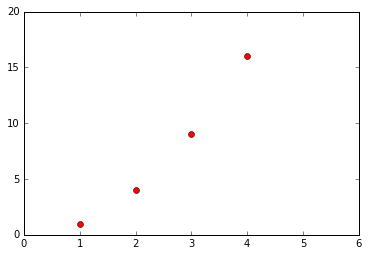

In [56]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0,6,0,20])

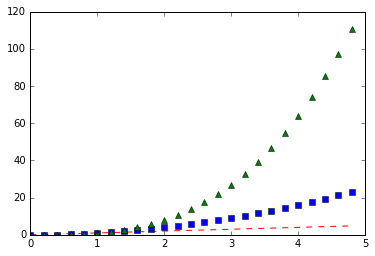

In [57]:
t = np.arange(0., 5., 0.2)
plt.plot(t,t,'r--', t, t**2, 'bs', t,t**3, 'g^')

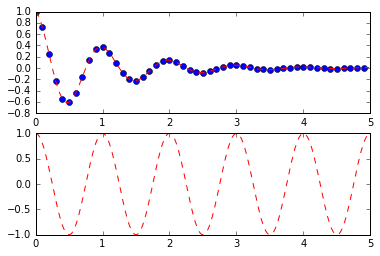

In [58]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
#plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2,f(t2),'r--')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

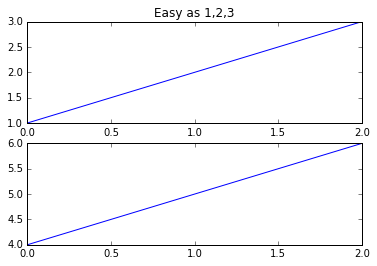

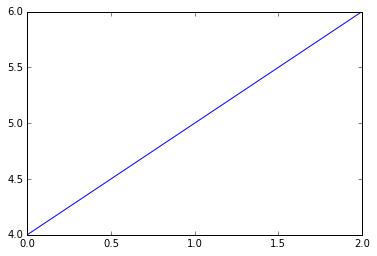

In [59]:
plt.figure(1)
plt.subplot(211)
plt.plot([1,2,3])
plt.subplot(212)
plt.plot([4,5,6])

plt.figure(2)
plt.plot([4,5,6])
plt.figure(1)
plt.subplot(211)
plt.title('Easy as 1,2,3')

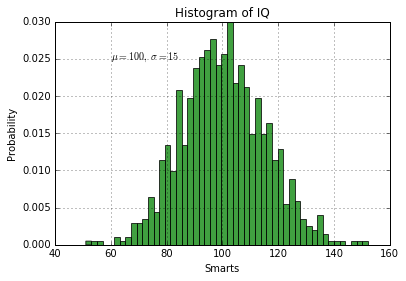

In [62]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000)
# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, 0.025, r'$\mu=100, \ \sigma=15$')
plt.axis([40,160, 0, 0.03])
plt.grid(True)

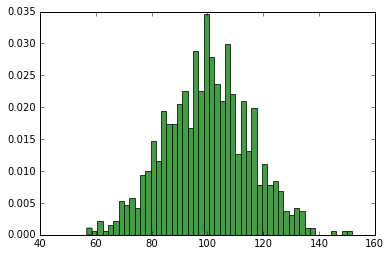

In [61]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000)
# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

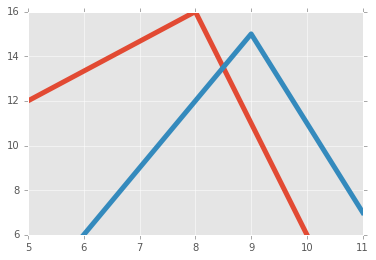

In [64]:
from matplotlib import style
style.use('ggplot')
x = [5,8,10]
y = [12, 16,6]
x2 = [6,9,11]
y2 = [6,15,7]
# can plot specifically, after just showing the defaults
plt.plot(x, y, linewidth=5)
plt.plot(x2, y2, linewidth=5)

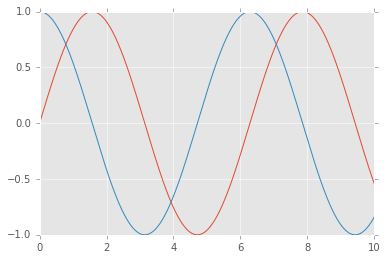

In [65]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x))

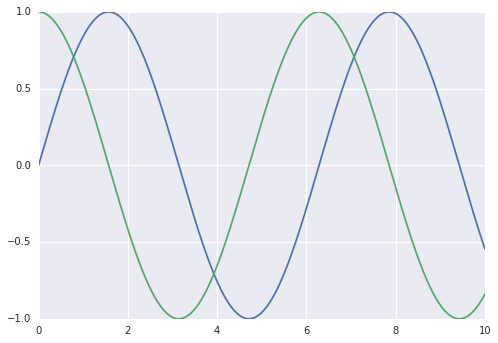

In [66]:
import seaborn as sns
sns.set()
plt.plot(x, np.sin(x), x, np.cos(x))

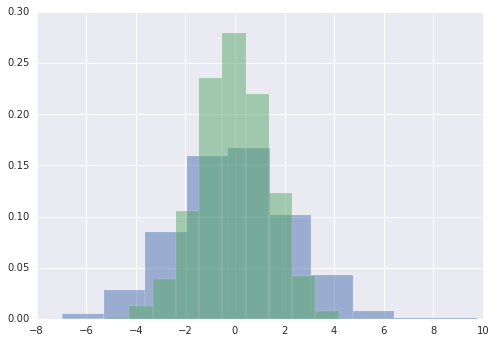

In [67]:
data = np.random.multivariate_normal([0,0], [[5,2], [2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

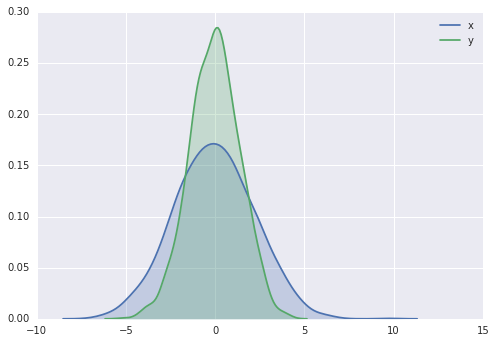

In [69]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

### Histograms and KDE can be combined using 'distplot'

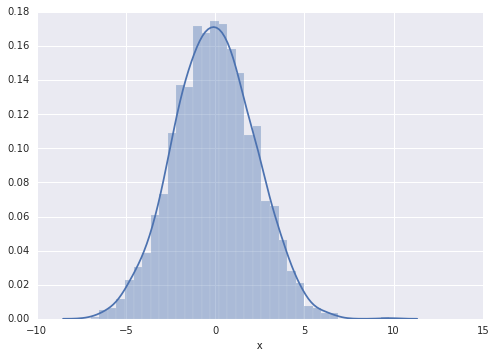

In [71]:
sns.distplot(data['x'])

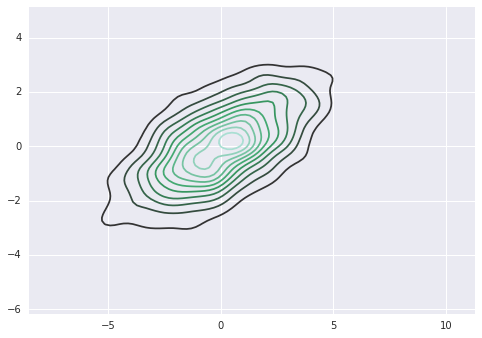

In [72]:
sns.kdeplot(data)

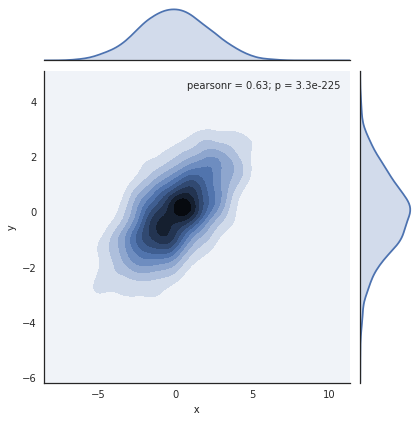

In [73]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

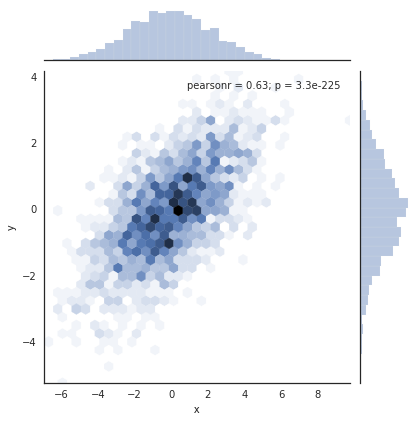

In [74]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

## Pairplots
Very useful for exploring correlations between multi-dimensional data. Plot all values against each other

In [75]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


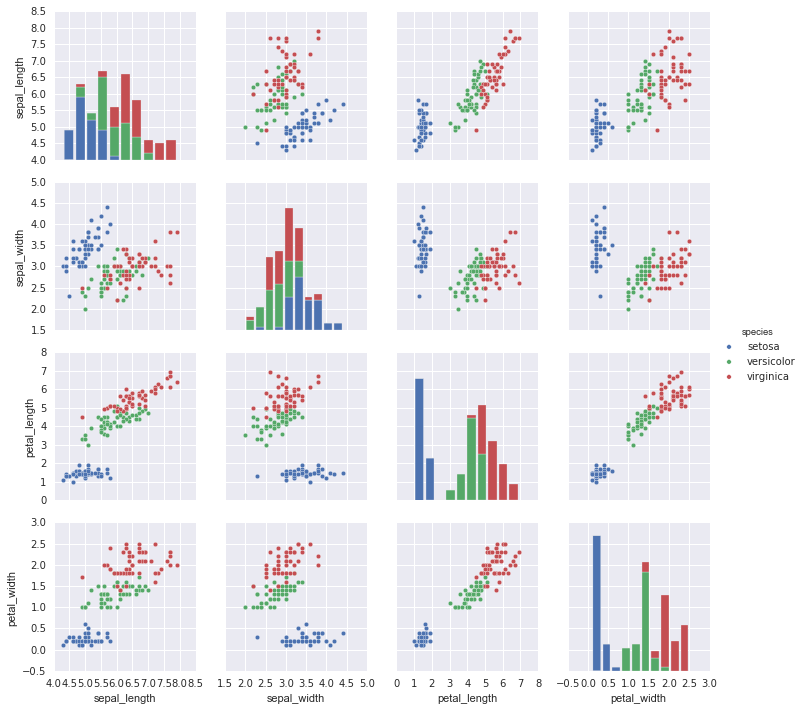

In [76]:
sns.pairplot(iris, hue='species', size=2.5)

### Faceted Histograms

In [77]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [78]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [79]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [80]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

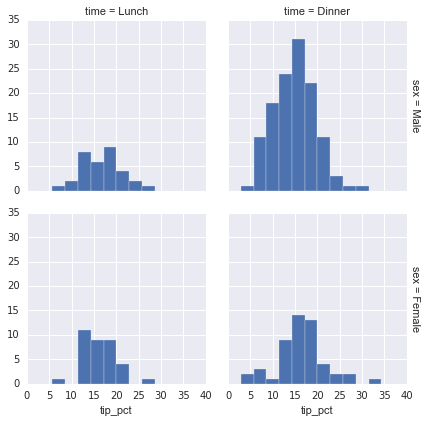

In [82]:
tips['tip_pct'] = 100 * tips['tip']/tips['total_bill']
grid = sns.FacetGrid(tips, row='sex', col="time", margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))

## Factor Plots
 Allows you to view the distribution of a prameter within bins defined by any other parameter

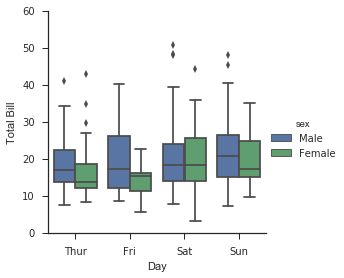

In [83]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

## Joint Distributions
Shows joint distribution between different datasets, along with associated marginal distributions

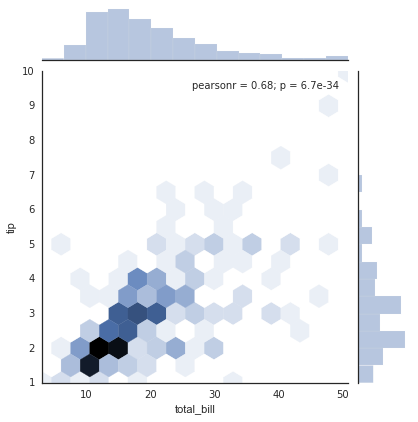

In [84]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex")

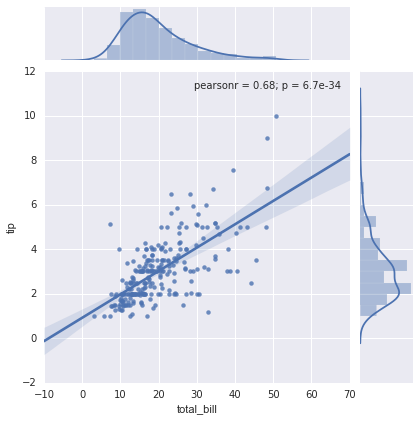

In [85]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg");

## Time series using factorplot

In [86]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [87]:
planets.shape

(1035, 6)

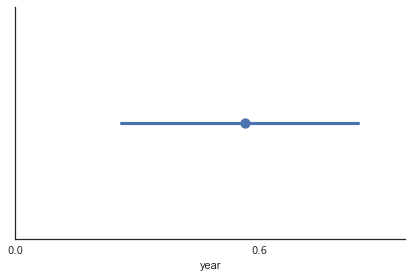

In [88]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=1.5)
    g.set_xticklabels(step=5)

TypeError: argument 2 to map() must support iteration

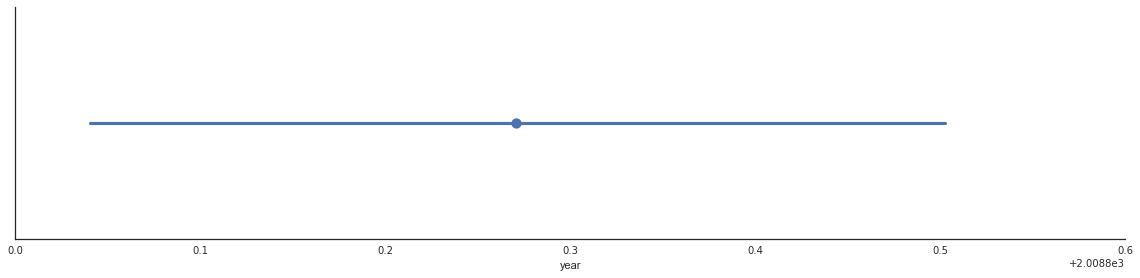

In [90]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0,
                       hue='method', x_order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')